# Capstone Assignment - Regression

<b>Description: </b>
The dataset contains 9568 datapoints regarding power output of the Combined Cycle Power Plant over 6 years (2006-2011). <br>
Features consist of hourly average ambient variables 
* Temperature (0) in the range 1.81°C and 37.11°C,
* Ambient Pressure (1) in the range 992.89-1033.30 milibar,
* Relative Humidity (2) in the range 25.56% to 100.16%
* Exhaust Vacuum (3) in teh range 25.36-81.56 cm Hg

* Net hourly electrical energy output (4) 420.26-495.76 MW


Objective: - <br>
The object of this task would to predict the Net Hourly (4) output based on these features: Temperature(0), Ambient Pressure (1), Relative Humidity (2), Exhaust Vacuum (3).

For the given dataset run a:-
* Polynomial Regression
* Lasso 
* Elastic Regression
    * Also display the MSE and MAE under each 

MSE (Mean Squared Error) : Sum of square of difference between true values and predicted (true values - predicted value ) whole divided by the number of observations (Example: https://www.statisticshowto.datasciencecentral.com/mean-squared-error/)

MAE (Mean Absolute Error) : Sum of abosulte value of differences between predicted values - true values ( predicted value - true value ) and whole divided by the number of observations (Example: https://www.statisticshowto.datasciencecentral.com/absolute-error/)

In [101]:
# Write your solution here
import numpy as np
import pandas as pd

dataset = pd.read_csv('../../../data/capstonedataset.csv')

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso

dataset = pd.read_csv('capstonedataset.csv')
features = dataset[['0','1','2','3']]
regr_clas = dataset['4'].values

# Preprocessing
new_features = []
for x in features.values:
    single_val = [float(i.replace('*','').replace('$','').replace('#','').replace('^', '').replace('%','')) for i in x]
    new_features.append(single_val)

train_data = np.array(new_features)
train_class = regr_clas

# Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(train_data, train_class, test_size=0.33, random_state=42)

# Creating a Polynomial Regression with 3 DOF
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])

# Fitting the model
model = model.fit(X_train, y_train)

# predicting the values
pred = model.predict(X_test)


# Creating Box Plots for the 2 results
print('Polynomial Regression')
fig3, ax3 = plt.subplots()
ax3.set_title("(1)-Real Values (2)-Predicted values")
red_square = dict(markerfacecolor='r', marker='s')
ax3.xaxis.grid(True)
ax3.boxplot([y_test, pred], patch_artist=True, flierprops=red_square, vert=False)
plt.show()

t = [x[0] for x in X_test]
ap = [x[1] for x in X_test]
rh = [x[2] for x in X_test]
v = [x[3] for x in X_test]

assert(len(t) == len(ap))
assert(len(rh) == len(v))

t_pred = [x for _,x in sorted(zip(t,pred))]
plt.scatter(sorted(t), t_pred)
plt.xlabel("Temperature")
plt.show()

ap_pred = [x for _,x in sorted(zip(ap,pred))]
plt.scatter(sorted(ap), ap_pred)
plt.xlabel("Ambient Pressure")
plt.show()

rh_pred = [x for _,x in sorted(zip(rh,pred))]
plt.scatter(sorted(rh), rh_pred)
plt.xlabel("Relative Humidity")
plt.show()

v_pred = [x for _,x in sorted(zip(v,pred))]
plt.scatter(sorted(v), v_pred)
plt.xlabel("Exhaust Vacuum")
plt.show()


mse = (sum((y_test - pred)**2))/len(pred)
print('MSE: {0:.3f}'.format(mse))
mae = (sum(abs(pred-y_test)))/len(pred)
print('MAE: {0:.3f}'.format(mae))


FileNotFoundError: File b'capstonedataset.csv' does not exist

Lasso Regression


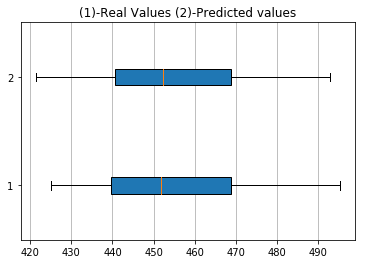

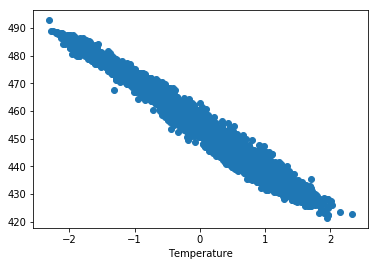

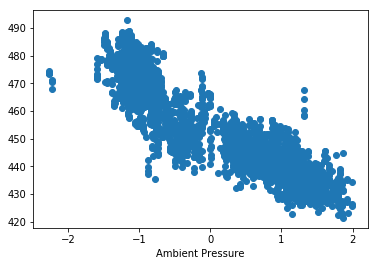

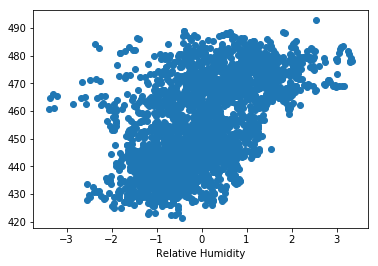

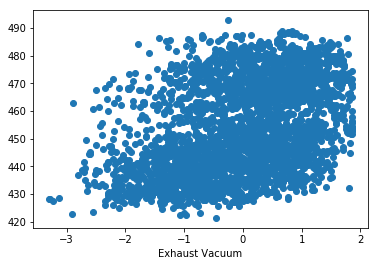

MSE: 21.235
MAE: 3.670


In [103]:
print('Lasso Regression')
clf = Lasso(alpha=0.1)
clf = clf.fit(X_train, y_train)
predL = clf.predict(X_test)

# Creating Box Plots for the 2 results
fig4, ax4 = plt.subplots()
ax4.set_title("(1)-Real Values (2)-Predicted values")
red_square = dict(markerfacecolor='r', marker='s')
ax4.xaxis.grid(True)
ax4.boxplot([y_test, predL], patch_artist=True, flierprops=red_square, vert=False)
plt.show()

t = [x[0] for x in X_test]
ap = [x[1] for x in X_test]
rh = [x[2] for x in X_test]
v = [x[3] for x in X_test]

assert(len(t) == len(ap))
assert(len(rh) == len(v))

t_pred = [x for _,x in sorted(zip(t,predL))]
plt.scatter(sorted(t), t_pred)
plt.xlabel("Temperature")
plt.show()

ap_pred = [x for _,x in sorted(zip(ap,predL))]
plt.scatter(sorted(ap), ap_pred)
plt.xlabel("Ambient Pressure")
plt.show()

rh_pred = [x for _,x in sorted(zip(rh,predL))]
plt.scatter(sorted(rh), rh_pred)
plt.xlabel("Relative Humidity")
plt.show()

v_pred = [x for _,x in sorted(zip(v,predL))]
plt.scatter(sorted(v), v_pred)
plt.xlabel("Exhaust Vacuum")
plt.show()


mse = (sum((y_test - predL)**2))/len(predL)
print('MSE: {0:.3f}'.format(mse))
mae = (sum(abs(predL-y_test)))/len(predL)
print('MAE: {0:.3f}'.format(mae))


SVR Analysis


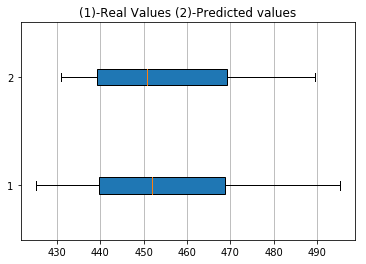

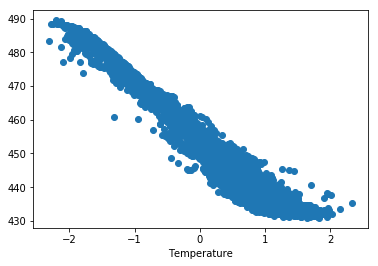

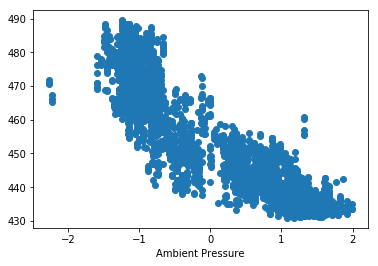

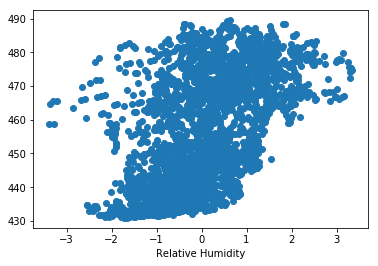

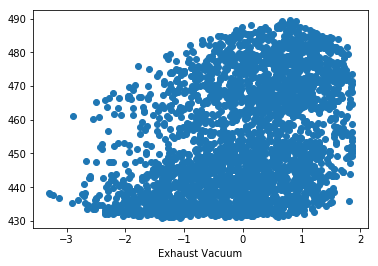

MSE: 17.566
MAE: 3.185


In [104]:
from sklearn.svm import SVR
from sklearn.preprocessing import scale

X_train = scale(X_train)
model = SVR('rbf')
model.fit(X_train, y_train)
X_test = scale(X_test)
predS = model.predict(X_test)

print('SVR Analysis')
fig5, ax5 = plt.subplots()
ax5.set_title("(1)-Real Values (2)-Predicted values")
red_square = dict(markerfacecolor='r', marker='s')
ax5.xaxis.grid(True)
ax5.boxplot([y_test, predS], patch_artist=True, flierprops=red_square, vert=False)
plt.show()

t = [x[0] for x in X_test]
ap = [x[1] for x in X_test]
rh = [x[2] for x in X_test]
v = [x[3] for x in X_test]

assert(len(t) == len(ap))
assert(len(rh) == len(v))

t_pred = [x for _,x in sorted(zip(t,predS))]
plt.scatter(sorted(t), t_pred)
plt.xlabel("Temperature")
plt.show()

ap_pred = [x for _,x in sorted(zip(ap,predS))]
plt.scatter(sorted(ap), ap_pred)
plt.xlabel("Ambient Pressure")
plt.show()

rh_pred = [x for _,x in sorted(zip(rh,predS))]
plt.scatter(sorted(rh), rh_pred)
plt.xlabel("Relative Humidity")
plt.show()

v_pred = [x for _,x in sorted(zip(v,predS))]
plt.scatter(sorted(v), v_pred)
plt.xlabel("Exhaust Vacuum")
plt.show()


mse = (sum((y_test - predS)**2))/len(predS)
print('MSE: {0:.3f}'.format(mse))
mae = (sum(abs(predS-y_test)))/len(predS)
print('MAE: {0:.3f}'.format(mae))


ElasticNet Analysis


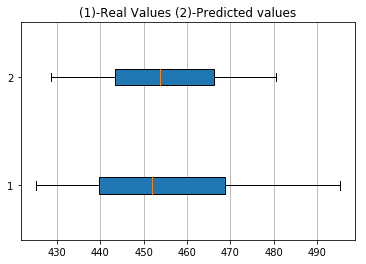

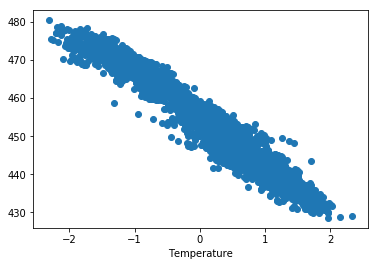

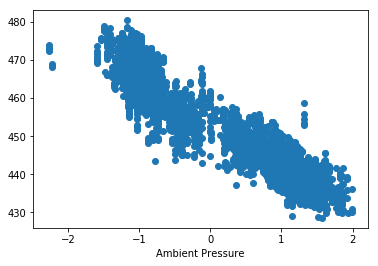

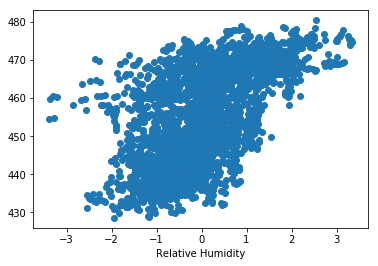

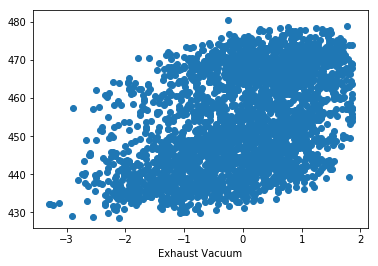

MSE: 40.813
MAE: 5.131


In [105]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
model.fit(X_train, y_train)
predE = model.predict(X_test)


print('ElasticNet Analysis')
fig6, ax6 = plt.subplots()
ax6.set_title("(1)-Real Values (2)-Predicted values")
red_square = dict(markerfacecolor='r', marker='s')
ax6.xaxis.grid(True)
ax6.boxplot([y_test, predE], patch_artist=True, flierprops=red_square, vert=False)
plt.show()

t = [x[0] for x in X_test]
ap = [x[1] for x in X_test]
rh = [x[2] for x in X_test]
v = [x[3] for x in X_test]

assert(len(t) == len(ap))
assert(len(rh) == len(v))

t_pred = [x for _,x in sorted(zip(t,predE))]
plt.scatter(sorted(t), t_pred)
plt.xlabel("Temperature")
plt.show()

ap_pred = [x for _,x in sorted(zip(ap,predE))]
plt.scatter(sorted(ap), ap_pred)
plt.xlabel("Ambient Pressure")
plt.show()

rh_pred = [x for _,x in sorted(zip(rh,predE))]
plt.scatter(sorted(rh), rh_pred)
plt.xlabel("Relative Humidity")
plt.show()

v_pred = [x for _,x in sorted(zip(v,predE))]
plt.scatter(sorted(v), v_pred)
plt.xlabel("Exhaust Vacuum")
plt.show()


mse = (sum((y_test - predE)**2))/len(predE)
print('MSE: {0:.3f}'.format(mse))
mae = (sum(abs(predE - y_test)))/len(predE)
print('MAE: {0:.3f}'.format(mae))